# Fourier Decomposition
Let's look into the foundation upon which the Fourier Decomposition is built and investigate how we can use it in data analysis and to detect seasonality therein.
Simply put, the idea is to superposition the data in a circle and detect underlying frequencies in the data by trying out many different frequencies and see which cause meaningful shifts in the circularized distribution. This process is called Fourier Transformation of a Fourier Series.

test

## Fourier Transformation
### Example Data
Let's do this on the very simple example of a sine with frequency 1/3.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sqrt
from matplotlib.animation import FuncAnimation
import matplotlib.transforms as mtransforms

In [12]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

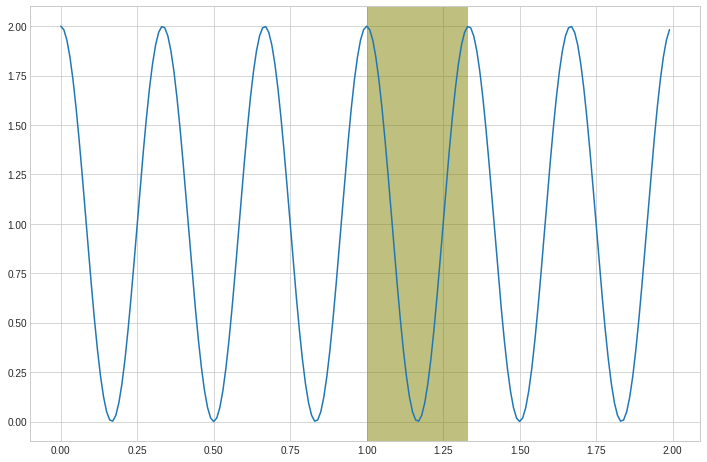

In [13]:
freq = 1/3
x = np.arange(0,2,0.01)
y = np.cos(x*np.pi*2/freq) + 1

fig, ax = plt.subplots()
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.plot(x, y)
ax.fill_between(x, 0, 1, where=np.logical_and(x >= 1, x <= (1+1/3)), facecolor='olive', alpha=0.5, transform=trans)

plt.show()

### Superpositioning of the Data
#### 1 Cycle per Period
After having created an example dataset, we transform this around a fixed point. The idea is to define how many cycles one x axis period on the graph above should represent. 1 means that in 1 x-axis time period, we walk around the circumference once. If we increase the number of cycles to two, we circulate around the unit circle twice in one time period. Now we take the entire timeframe of which we have data and transform this accordingly. Let's set the number of cycles per period to 1 for an easy start and see how this would look:

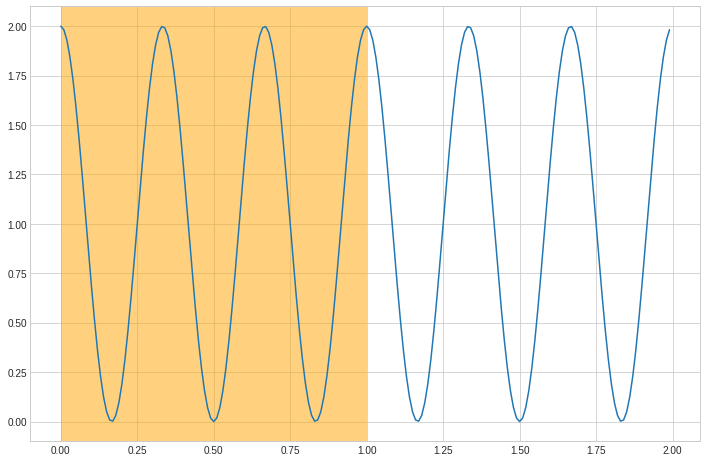

In [14]:
fig, ax = plt.subplots()
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.plot(x, y)
ax.fill_between(x, 0, 1, where=np.logical_and(x >= 0, x <= (1)), facecolor='orange', alpha=0.5, transform=trans)

plt.show()

In [23]:
def calc_wind(signal_x, signal_y):
    return exp(-2*np.pi*signal_x*winding_freq*1j)*signal_y

In [35]:
test = complex(2,3)
test2 = test*1j

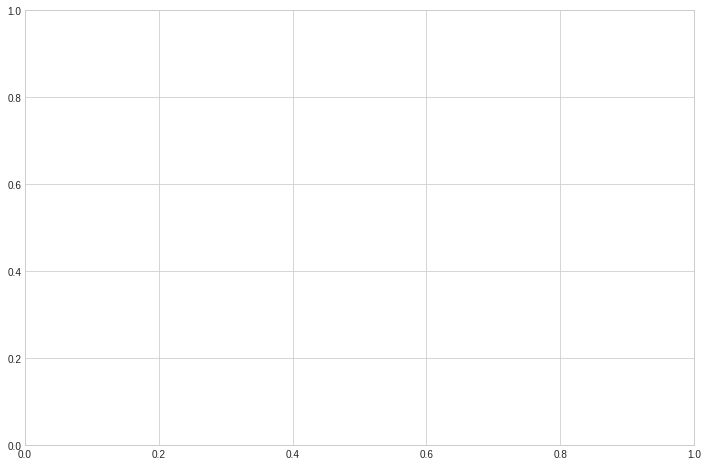

In [40]:
# plt.arrow(0,0, test.real, test.imag, head_width=0.3, color='blue')
plt.arrow(0,0, test2.real, test2.imag, head_width=0.3, color='orange')

In [24]:
winding_freq = 1
x_circ = []
y_circ = []
for i in range(len(x)):
    signal_new = calc_wind(x[i], y[i])
    x_circ.append(signal_new.real)
    y_circ.append(signal_new.imag)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [20]:
winding_freq = 1
x_circ = []
y_circ = []
for i in range(len(x)):
    x_circ.append(np.cos(x[i] * winding_freq * 2 * np.pi)*y[i])
    y_circ.append(-np.sin(x[i] * winding_freq * 2 * np.pi)*y[i])

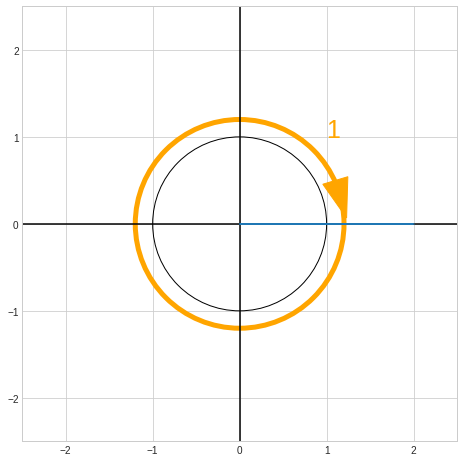

In [25]:
fig, ax = plt.subplots()

ax.add_artist(plt.Circle((0, 0), 1, fill=False))
ax.add_artist(plt.Circle((0, 0), 1.2, fill=False, color='orange', linewidth=5))
plt.arrow(1.1,0.5,0.0003, -0.001, head_width=0.3, color='orange')
plt.hlines(0, xmin=-2.5, xmax=2.5)
plt.vlines(0, ymin=-2.5, ymax=2.5)

plt.text(1,1,'1', fontsize=25, color='orange')

plt.plot(x_circ, y_circ)

plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
ax.set_aspect('equal')

#### 2 Cycles per Period
If we now change the number of cycles to 0.5, we need two periods to circle once.

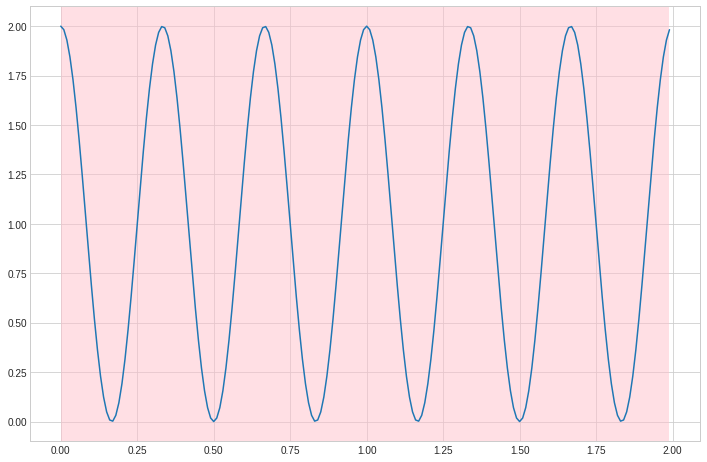

In [9]:
fig, ax = plt.subplots()
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.plot(x, y)
ax.fill_between(x, 0, 1, where=np.logical_and(x >= 0, x <= (2)), facecolor='pink', alpha=0.5, transform=trans)

plt.show()

In [10]:
winding_freq = 2
x_circ = []
y_circ = []
for i in range(len(x)):
    x_circ.append(np.cos(x[i] * winding_freq * 2 * np.pi)*y[i])
    y_circ.append(-np.sin(x[i] * winding_freq * 2 * np.pi)*y[i])

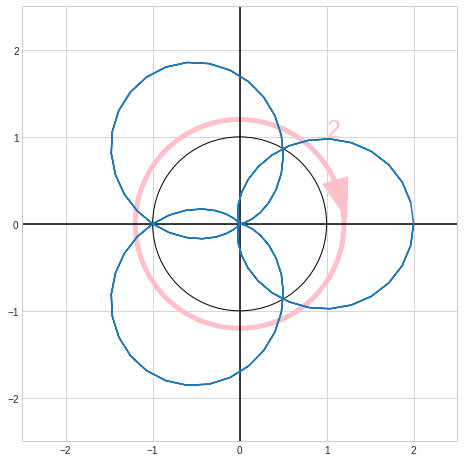

In [11]:
fig, ax = plt.subplots()

ax.add_artist(plt.Circle((0, 0), 1, fill=False))
ax.add_artist(plt.Circle((0, 0), 1.2, fill=False, color='pink', linewidth=5))
plt.arrow(1.1,0.5,0.0003, -0.001, head_width=0.3, color='pink')
plt.hlines(0, xmin=-2.5, xmax=2.5)
plt.vlines(0, ymin=-2.5, ymax=2.5)

plt.text(1,1,'2', fontsize=25, color='pink')

plt.plot(x_circ, y_circ)

plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
ax.set_aspect('equal')

#### Try many different cycles
We can now do this for many different cycles and find out what happens... ;)

In [14]:
def animate(i):
    x_tmp = []
    y_tmp = []
    for j in range(len(x)):
        x_tmp.append(np.cos(x[j] * frequencies_to_wind[i] * 2 * np.pi)*y[j])
        y_tmp.append(-np.sin(x[j] * frequencies_to_wind[i] * 2 * np.pi)*y[j])
    line.set_data(x_tmp, y_tmp)
    cycle_text.set_text(str(np.round(frequencies_to_wind[i],2)))
    return line, cycle_text

def init():
    return line, cycle_text

In [15]:
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.set_aspect('equal')

ax.add_artist(plt.Circle((0, 0), 1, fill=False))
plt.hlines(0, xmin=-2.5, xmax=2.5)
plt.vlines(0, ymin=-2.5, ymax=2.5)

line, = ax.plot([], [], lw=3)
cycle_text = ax.annotate(s='test', xy=(2, 2))
cycle_text.set_animated(True)

frames = 500
winding_range = 4

frequencies_to_wind = np.arange(0, winding_range, winding_range / frames)

FuncAnimation(fig, animate, frames=frames, init_func=init, interval=100, blit=False).save('circular_superposition.gif', writer='pillow')
plt.close()

![SegmentLocal](circular_superposition.gif "segment")

#### Density Shift and Fourier Transformation
Looking at the animation we see that when the time around the circle matches the period of the underlying function, the distribution of the data points shifts. If we now calculate some form of density estimate, we can track it depending on the current frequency.

In [16]:
winding_frequency = 3
x_circ = []
y_circ = []
for i in range(len(x)):
    x_circ.append(np.cos(x[i] * winding_frequency * 2 * np.pi)*y[i])
    y_circ.append(np.sin(x[i] * winding_frequency * 2 * np.pi)*y[i])

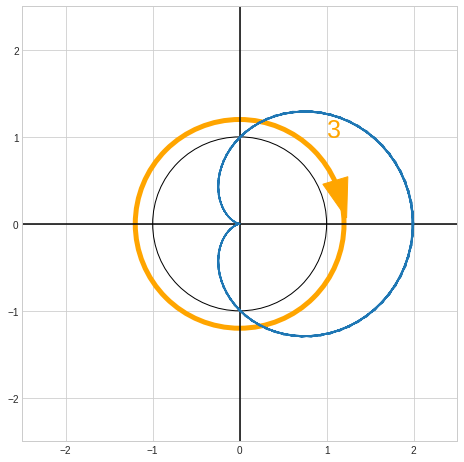

In [20]:
fig, ax = plt.subplots()

ax.add_artist(plt.Circle((0, 0), 1, fill=False))
ax.add_artist(plt.Circle((0, 0), 1.2, fill=False, color='orange', linewidth=5))
plt.arrow(1.1,0.5,0.0003, -0.001, head_width=0.3, color='orange')
plt.hlines(0, xmin=-2.5, xmax=2.5)
plt.vlines(0, ymin=-2.5, ymax=2.5)

plt.text(1,1,'3', fontsize=25, color='orange')

plt.plot(x_circ, y_circ)

plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
ax.set_aspect('equal')

In [22]:
def animate_with_density(i):
    x_tmp = []
    y_tmp = []
    for j in range(len(x)):
        x_tmp.append(np.cos(x[j] * frequencies_to_wind[i] * 2 * np.pi)*y[j])
        y_tmp.append(-np.sin(x[j] * frequencies_to_wind[i] * 2 * np.pi)*y[j])
    line.set_data(x_tmp, y_tmp)
    point.set_data(np.mean(x_tmp), np.mean(y_tmp))
    cycle_text.set_text(str(np.round(frequencies_to_wind[i],2)))
    return line, cycle_text, point

In [23]:
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.set_aspect('equal')

ax.add_artist(plt.Circle((0, 0), 1, fill=False))
plt.hlines(0, xmin=-2.5, xmax=2.5)
plt.vlines(0, ymin=-2.5, ymax=2.5)

line, = ax.plot([], [], lw=3)
point, = ax.plot([], [], 'o', lw=3)
cycle_text = ax.annotate(s='test', xy=(2, 2))
cycle_text.set_animated(True)

frames = 500
winding_range = 10

frequencies_to_wind = np.arange(0, winding_range, winding_range / frames)

FuncAnimation(fig, animate_with_density, frames=frames, interval=100, blit=False).save('circular_superposition_density.gif', writer='pillow')
plt.close()

![SegmentLocal](circular_superposition_density.gif "segment")

In [24]:
frames = 500
winding_range = 10

frequencies_to_wind = np.arange(0, winding_range, winding_range / frames)
position = []

for winding_frequency in frequencies_to_wind:
    x_tmp = []
    y_tmp = []
    for i in range(len(x)):
        x_tmp.append(np.cos(x[i] * winding_frequency * 2 * np.pi)*y[i])
        y_tmp.append(np.sin(x[i] * winding_frequency * 2 * np.pi)*y[i])
    position.append(np.mean(x_tmp))

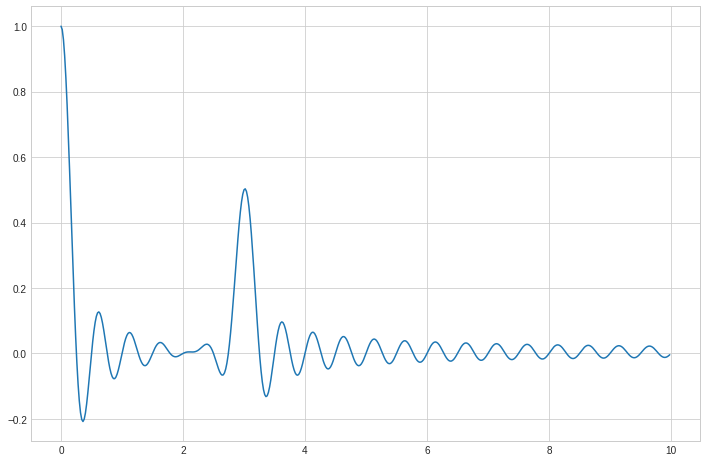

In [25]:
plt.plot(frequencies_to_wind, position)

The real Fourier Transform formula works similarly, although not by averaging the points to get the center, but by integrating over the entire range. This leads to a function with much more pronounced reactions to shifts in the distribution.
\begin{align}
\int_{-\infty }^{\infty } f(x)e^{2\pi i x \xi } dx
\end{align}

### Application on a more complex example
Let's look at the following data distribution and find out what the underlying periods are:

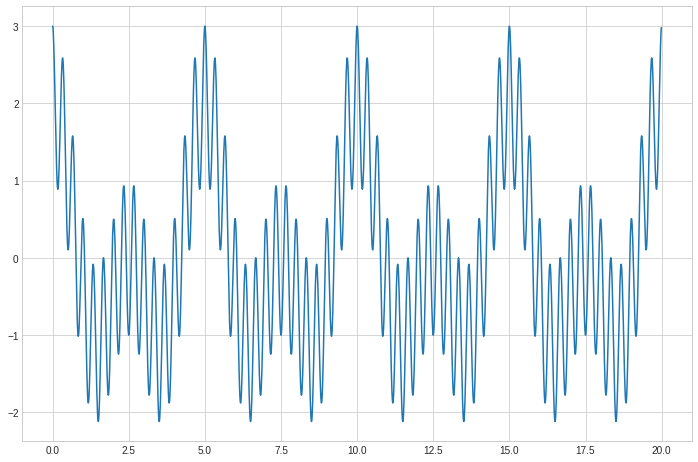

In [30]:
freq1 = 1/3
freq2 = 2.5
freq3 = 5
x = np.arange(0,20,0.01)
y = np.cos(x*np.pi*2/freq1) + np.cos(x*np.pi*2/freq2) + np.cos(x*np.pi*2/freq3)

fig, ax = plt.subplots()
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.plot(x, y)
plt.show()

In [115]:
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.set_aspect('equal')

ax.add_artist(plt.Circle((0, 0), 1, fill=False))
plt.hlines(0, xmin=-2.5, xmax=2.5)
plt.vlines(0, ymin=-2.5, ymax=2.5)

line, = ax.plot([], [], lw=3)
cycle_text = ax.annotate(s='test', xy=(2, 2))
cycle_text.set_animated(True)

frames = 1000
winding_range = 5

frequencies_to_wind = np.arange(0, winding_range, winding_range / frames)

FuncAnimation(fig, animate, frames=frames, init_func=init, interval=100, blit=False).save('circular_superposition_multi.gif', writer='pillow')
plt.close()

![SegmentLocal](circular_superposition_multi.gif "segment")

In [61]:
frames = 1000
winding_range = 5

frequencies_to_wind = np.arange(0, winding_range, winding_range / frames)
position = []

for winding_frequency in frequencies_to_wind:
    x_tmp = []
    y_tmp = []
    for i in range(len(x)):
        x_tmp.append(np.cos(x[i] * winding_frequency * 2 * np.pi)*y[i])
        y_tmp.append(np.sin(x[i] * winding_frequency * 2 * np.pi)*y[i])
    position.append(np.mean(x_tmp))
position = np.array(position)

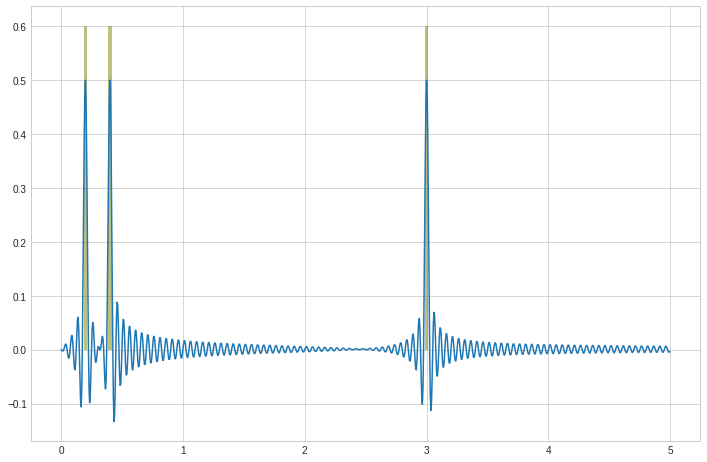

In [91]:
fig, ax = plt.subplots()

plt.plot(frequencies_to_wind, position)

ax.fill_between(frequencies_to_wind, 0, 0.6, where=position > 0.2, facecolor='olive', alpha=0.5)

In [63]:
for i in 1/frequencies_to_wind[position>0.49]:
    print(i)

5.0
2.5
0.3333333333333333


## How to do this easier :) 
Of course there is an implementation in python already available:

In [82]:
from scipy.fft import fft, fftfreq
import pandas as pd

In [102]:
fourier = fft(y).real

In [103]:
freq = fftfreq(fourier.size, 0.01)

(0.0, 5.0)

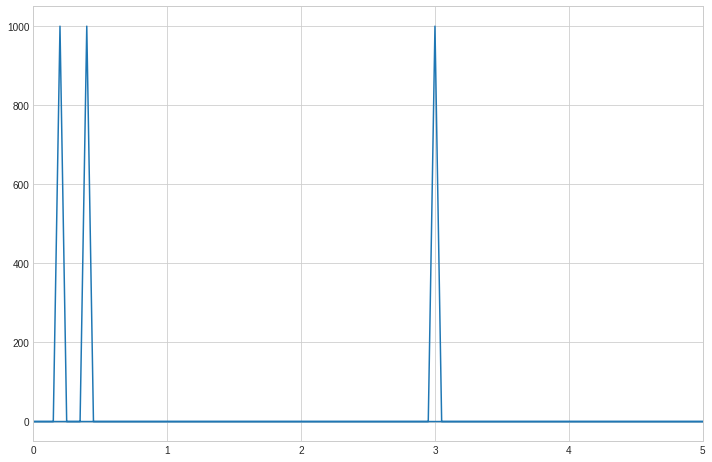

In [104]:
plt.plot(freq, fourier)
plt.xlim([0,5])

In [109]:
data = pd.DataFrame({'amplitude': fourier, 'frequency': freq, 'inv_freq': 1/freq})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [111]:
data[data.frequency > 0].sort_values('amplitude', ascending=False).head()

,amplitude,frequency,inv_freq
4,1.000000e+03,0.20,5.000000
8,1.000000e+03,0.40,2.500000
60,1.000000e+03,3.00,0.333333
750,2.791966e-12,37.50,0.026667
59,2.727593e-12,2.95,0.338983


And here we are already. We have a list of the most probably frequencies contained in the data.